In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [3]:
def PlotHistoByUncertainty(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [4]:
def PlotHistoByExp(topic, sExp):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Exponent'].isin(sExp.keys())].set_index('Exponent')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sExp)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [5]:
def PlotHistoByX(topic, sX):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Value'].isin(sX.keys())].set_index('Input Value')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sX)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [6]:
def PlotCompare(topic, leftLegend=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

In [7]:
def PlotEdge(topic, xLabel, leftLegend=(1.1,1), rightLegend=(1.1,0.1), sigma=0, xlim=[], ylog=False):
    fig, ax = plt.subplots()
    ax.set_title(f'{topic}')
    ax.set_xlabel(xLabel)
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel(r'Upper Bound $\delta x$')
    ax.grid(True)
    ax.plot(df['X'], df['Edge'], f'k-', label=r'Upper Bound $\delta x$')
    if sigma:
            ax.plot(df['X'], df['Edge']/sigma, f'k--', label=r'$\delta x = x/5$')

    ax2 = ax.twinx()
    if ylog:
        ax2.set_yscale('log')
    ax2.set_ylabel('Upper Bound Bias and Uncertainty')
    ax2.plot(df['X'], df['Bias'], c='gray', ls='--', label='Upper Bound Uncertainty Bias')
    ax2.plot(df['X'], df['Uncertainty'], c='gray', ls='-', label='Upper Bound Uncertainty')

    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

## Power

In [8]:
df = pd.read_csv("../Python/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,NotMonotonicException: (1.000000e+00~1.981e-01...
1,-2.95,0.19813,0.385440,1.385440,80.094733,NotMonotonicException: (1.000000e+00~1.981e-01...
2,-2.90,0.19818,0.366343,1.366343,68.104630,NotMonotonicException: (1.000000e+00~1.982e-01...
3,-2.85,0.19823,0.348504,1.348504,57.861393,NotMonotonicException: (1.000000e+00~1.982e-01...
4,-2.80,0.19828,0.331793,1.331793,49.117552,NotMonotonicException: (1.000000e+00~1.983e-01...


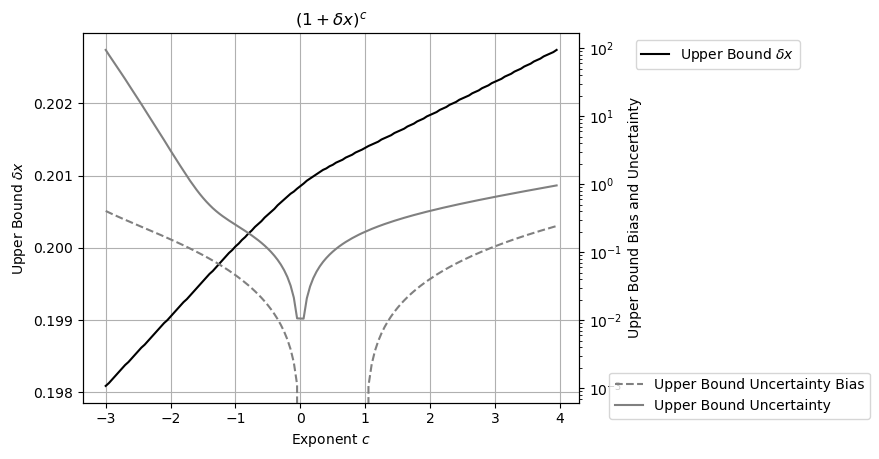

In [9]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', rightLegend=(1.6,0.1), ylog=True)

In [10]:
df = pd.read_csv("../Java/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,Type.NotMonotonicException
1,-2.95,0.19813,0.385440,1.385440,80.094733,Type.NotMonotonicException
2,-2.90,0.19818,0.366343,1.366343,68.104630,Type.NotMonotonicException
3,-2.85,0.19823,0.348504,1.348504,57.861393,Type.NotMonotonicException
4,-2.80,0.19828,0.331793,1.331793,49.117552,Type.NotMonotonicException


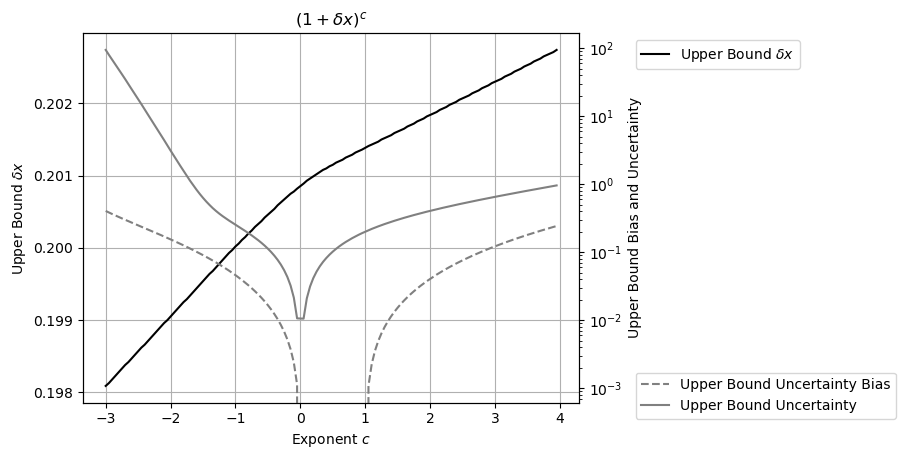

In [11]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', ylog=True)

In [45]:
df = pd.read_csv("../Cpp/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,NotMonotonicException
1,-2.95,0.19813,0.385440,1.385440,80.094733,NotMonotonicException
2,-2.90,0.19818,0.366343,1.366343,68.104630,NotMonotonicException
3,-2.85,0.19823,0.348504,1.348504,57.861393,NotMonotonicException
4,-2.80,0.19828,0.331793,1.331793,49.117552,NotMonotonicException


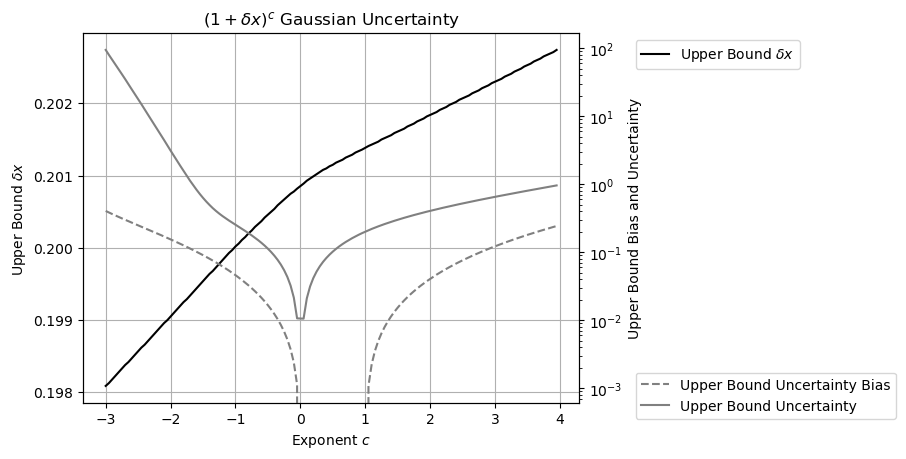

In [46]:
PlotEdge(topic=r'$(1 + \delta x)^c$ Gaussian Uncertainty', xLabel=r'Exponent $c$', ylog=True)

In [42]:
df = pd.read_csv("../Python/Output/PowEdge.Uniform.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.57361,5548.161032,5549.161032,60912.024618,NotMonotonicException: (1.000000e+00~5.736e-01...
1,-2.95,0.57370,4629.447935,4630.447935,50667.685425,NotMonotonicException: (1.000000e+00~5.737e-01...
2,-2.90,0.57379,3860.292395,3861.292395,42111.416141,NotMonotonicException: (1.000000e+00~5.738e-01...
3,-2.85,0.57389,3231.312742,3232.312742,35111.456403,NotMonotonicException: (1.000000e+00~5.739e-01...
4,-2.80,0.57398,2690.780017,2691.780017,29132.346197,NotMonotonicException: (1.000000e+00~5.740e-01...


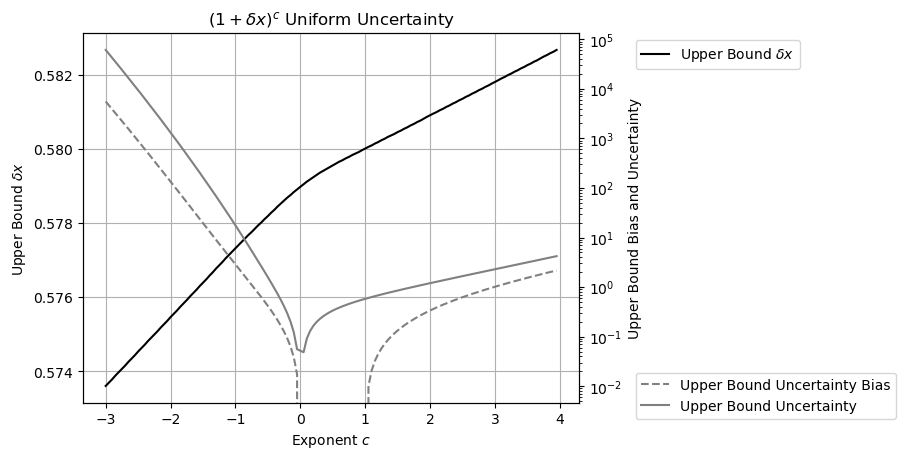

In [43]:
PlotEdge(topic=r'$(1 + \delta x)^c$ Uniform Uncertainty', xLabel=r'Exponent $c$', ylog=True)

# Sin

In [47]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.000,4.818606e-17,-7.427862e-17,0.657520,NotPositiveException: sin(-3.141593e+00~1.001e...
1,-3.092505,1.000,1.930661e-02,-2.976106e-02,0.657094,NotPositiveException: sin(-3.092505e+00~1.001e...
2,-3.043418,1.002,3.868561e-02,-5.933153e-02,0.656233,NotPositiveException: sin(-3.043418e+00~1.003e...
3,-2.994330,1.005,5.817888e-02,-8.855160e-02,0.654744,NotPositiveException: sin(-2.994330e+00~1.006e...
4,-2.945243,1.010,7.794525e-02,-1.171451e-01,0.652858,NotPositiveException: sin(-2.945243e+00~1.011e...


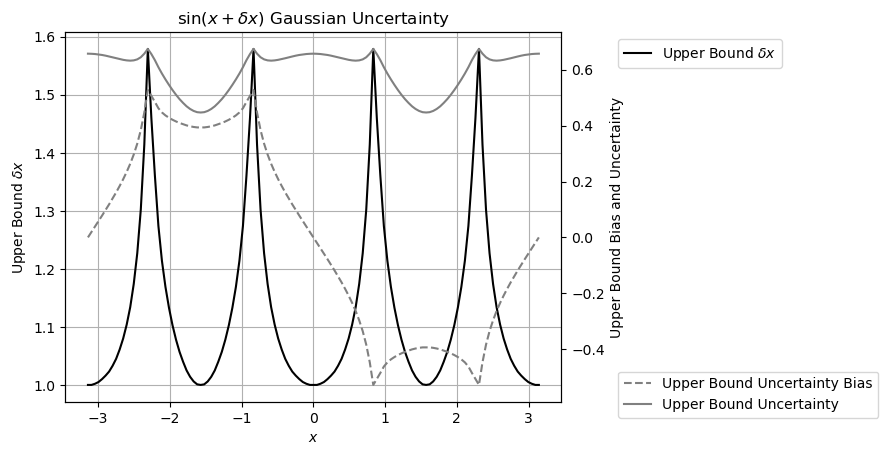

In [48]:
PlotEdge(topic=r'$\sin(x + \delta x)$ Gaussian Uncertainty', xLabel=r'$x$')

In [49]:
df = pd.read_csv("../Java/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.0000,4.818606e-17,-7.427862e-17,0.657520,Type.NotPositiveException
1,-3.092505,1.0006,1.932447e-02,-2.974321e-02,0.657217,Type.NotPositiveException
2,-3.043418,1.0024,3.870939e-02,-5.930775e-02,0.656315,Type.NotPositiveException
3,-2.994330,1.0056,5.823227e-02,-8.849820e-02,0.654868,Type.NotPositiveException
4,-2.945243,1.0101,7.795708e-02,-1.171332e-01,0.652878,Type.NotPositiveException


In [50]:
df['Edge'] /= math.pi

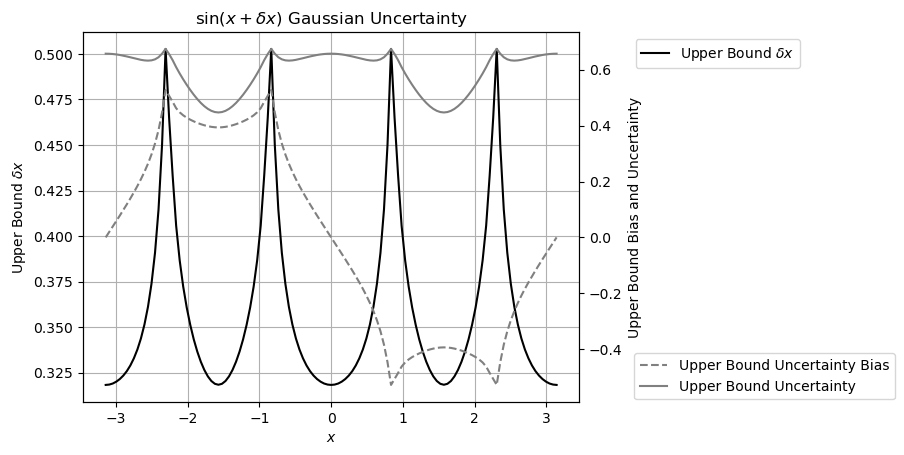

In [51]:
PlotEdge(topic=r'$\sin(x + \delta x)$ Gaussian Uncertainty', xLabel=r'$x$', rightLegend=(1.65,0.15))

In [52]:
df = pd.read_csv("../Cpp/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.0000,4.818447e-17,-7.427617e-17,0.657520,NotPositiveException
1,-3.092505,1.0006,1.932447e-02,-2.974321e-02,0.657217,NotPositiveException
2,-3.043418,1.0024,3.870939e-02,-5.930775e-02,0.656315,NotPositiveException
3,-2.994330,1.0056,5.823227e-02,-8.849820e-02,0.654868,NotPositiveException
4,-2.945243,1.0101,7.795708e-02,-1.171332e-01,0.652878,NotPositiveException


In [20]:
df['Edge'] /= math.pi

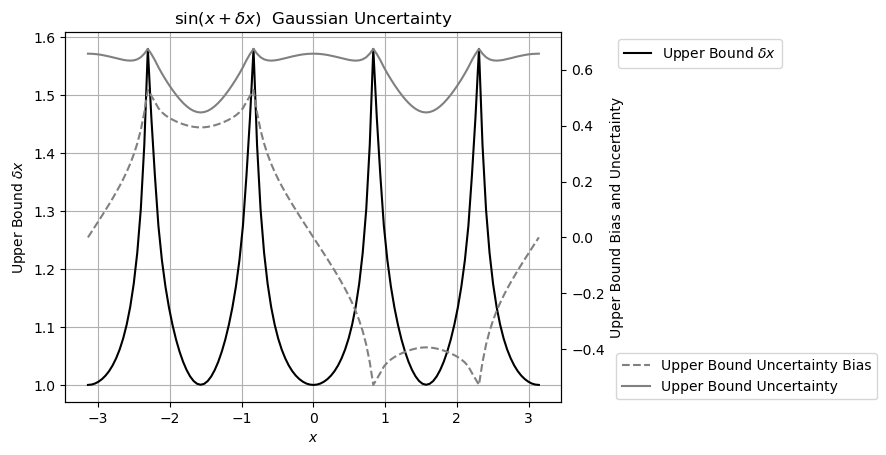

In [53]:
PlotEdge(topic=r'$\sin(x + \delta x)$  Gaussian Uncertainty', xLabel=r'$x$', rightLegend=(1.65,0.15))

In [54]:
df = pd.read_csv("../Python/Output/SinEdge.Uniform.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.290,7.928468e-17,-4.318000e-17,0.780118,NotPositiveException: sin(-3.141593e+00~1.291e...
1,-3.092505,1.291,3.180367e-02,-1.726401e-02,0.779597,NotPositiveException: sin(-3.092505e+00~1.292e...
2,-3.043418,1.293,6.367785e-02,-3.433929e-02,0.778036,NotPositiveException: sin(-3.043418e+00~1.294e...
3,-2.994330,1.295,9.554518e-02,-5.118530e-02,0.775446,NotPositiveException: sin(-2.994330e+00~1.296e...
4,-2.945243,1.299,1.276205e-01,-6.746982e-02,0.771877,NotPositiveException: sin(-2.945243e+00~1.300e...


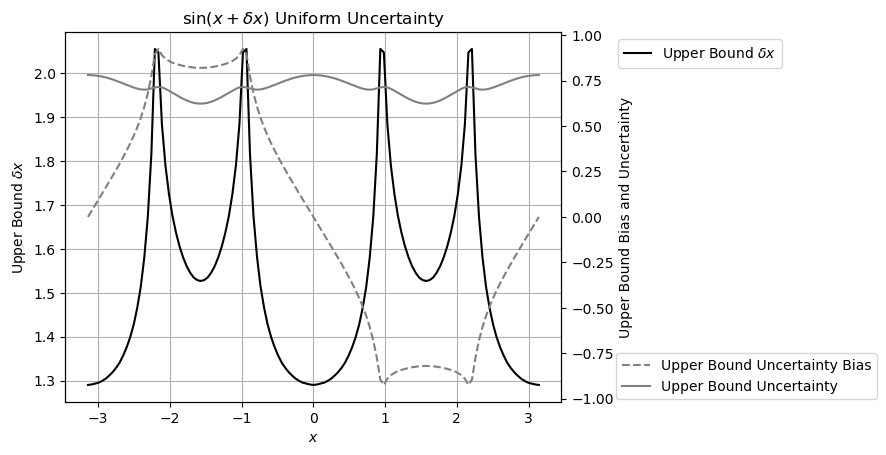

In [55]:
PlotEdge(topic=r'$\sin(x + \delta x)$ Uniform Uncertainty', xLabel=r'$x$', rightLegend=(1.65,0.15))

# Power

## Square

In [22]:
df = pd.read_csv("../Python/Output/SquareAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2.000000,1,0.2,1.039999,0.403976,1.039098,0.404807,-0.002230,1.002056,0,...,0.033287,0.025388,0.020588,0.015828,0.011411,0.008634,0.006702,0.005061,0.003411,0.001429
1,1.999999,1,0.2,1.039999,0.403976,1.043340,0.404448,0.008271,1.001168,0,...,0.033594,0.026670,0.020752,0.015710,0.012188,0.009068,0.006612,0.005173,0.003301,0.001087
2,2.000001,1,0.2,1.039999,0.403977,1.042565,0.405406,0.006350,1.003537,0,...,0.033944,0.026968,0.019650,0.015804,0.011798,0.008828,0.006674,0.004862,0.003382,0.001238


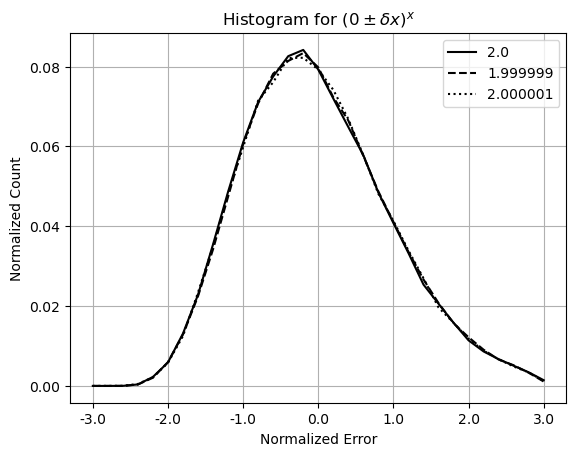

In [23]:
PlotHistoByExp(topic=r'$(0 \pm \delta x)^x$', sExp={2.0: 'k', 1.999999: 'k--', 2.000001: 'k:'})

In [24]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,-0.2,0.2,0.079999,0.097976,0.079797,0.097183,-0.002070,0.991907,0,...,0.022663,0.017760,0.014100,0.012866,0.009981,0.008309,0.006718,0.005913,0.004598,0.001957
1,2,-0.1,0.2,0.049999,0.069277,0.049753,0.068781,-0.003552,0.992835,0,...,0.019085,0.015867,0.013088,0.010493,0.008633,0.007141,0.006457,0.005282,0.004730,0.001931
2,2,0.0,0.2,0.039999,0.056563,0.040182,0.056432,0.003233,0.997676,0,...,0.018673,0.014918,0.012769,0.011357,0.009075,0.007080,0.005443,0.005085,0.004174,0.001811
3,2,0.1,0.2,0.049999,0.069277,0.049668,0.069021,-0.004783,0.996294,0,...,0.018965,0.016390,0.013018,0.010453,0.008665,0.007889,0.005947,0.005017,0.004363,0.001921
4,2,0.2,0.2,0.079999,0.097976,0.080075,0.098324,0.000770,1.003550,0,...,0.021588,0.018383,0.014617,0.012484,0.010462,0.007951,0.006584,0.005492,0.004930,0.001817


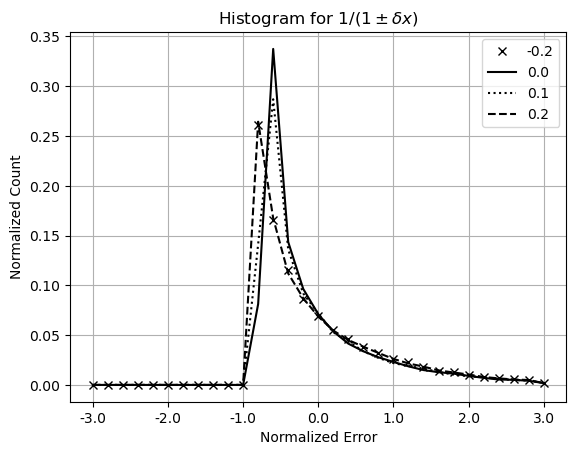

In [25]:
PlotHistoByX(topic=r'$1/(1 \pm \delta x)$', sX={0: 'k', 0.2: 'k--', 0.1: 'k:', -0.2: 'kx'})

## Inversion

In [26]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.2000,1.046250,0.254843,1.046655,0.247101,0.001589,0.969618,0,...,0.023529,0.019225,0.014920,0.011172,0.008488,0.006280,0.005399,0.004315,0.003353,0.001317
1,-1,1,0.1000,1.010316,0.104291,1.009964,0.104362,-0.003376,1.000687,0,...,0.032175,0.024861,0.020258,0.014818,0.011574,0.008583,0.006276,0.004342,0.003052,0.001169
2,-1,1,0.0100,1.000100,0.010004,1.000051,0.009998,-0.004899,0.999415,91,...,0.038096,0.029525,0.022517,0.016311,0.010968,0.007519,0.004722,0.002687,0.001785,0.000571
3,-1,1,0.0010,1.000001,0.001000,1.000001,0.001002,-0.000431,1.002457,130,...,0.037905,0.029772,0.023054,0.016967,0.011081,0.006939,0.004703,0.002898,0.001614,0.000471
4,-1,1,0.0001,1.000000,0.000100,1.000000,0.000100,-0.003054,0.997988,107,...,0.039493,0.029891,0.021781,0.015807,0.010645,0.007207,0.004541,0.002746,0.001594,0.000511


In [27]:
df['Input Uncertainty'].unique()

array([2.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

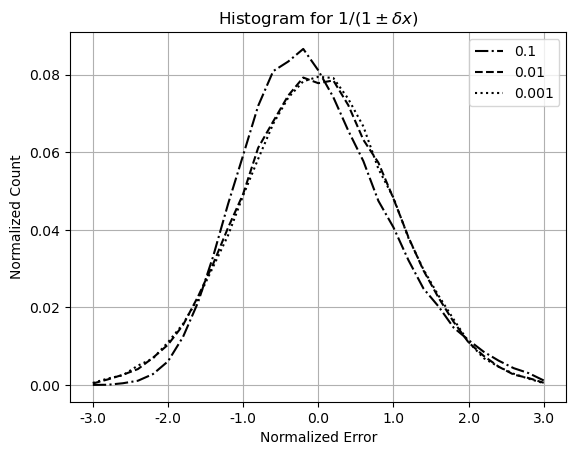

In [28]:
PlotHistoByUncertainty(topic=r'$1/(1 \pm \delta x)$', sInput={0.199802: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

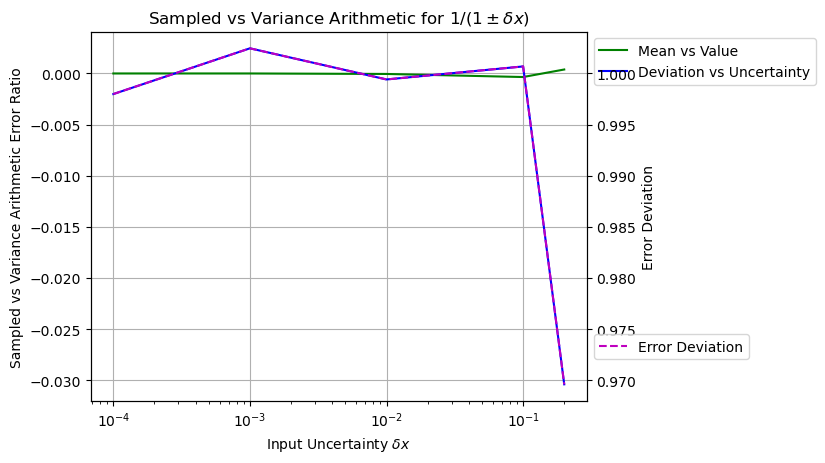

In [29]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [30]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.2011,0.994728,0.102551,0.995064,0.102398,0.003276,0.998511,422,...,0.042960,0.031389,0.022128,0.014856,0.009713,0.005344,0.002742,0.001235,0.000814,0.000181
1,0.5,1,0.1000,0.998738,0.050224,0.998847,0.050277,0.002175,1.001056,253,...,0.042095,0.031531,0.022321,0.015510,0.010142,0.006180,0.003832,0.001986,0.001154,0.000351
2,0.5,1,0.0100,0.999987,0.005000,0.999997,0.005006,0.001910,1.001112,156,...,0.039240,0.029673,0.021841,0.016506,0.011061,0.007220,0.004483,0.002888,0.001494,0.000351
3,0.5,1,0.0010,1.000000,0.000500,1.000001,0.000499,0.003015,0.997273,125,...,0.039676,0.030421,0.021828,0.016524,0.010277,0.007189,0.004813,0.002487,0.001484,0.000642


In [31]:
df['Input Uncertainty'].unique()

array([0.2011, 0.1   , 0.01  , 0.001 ])

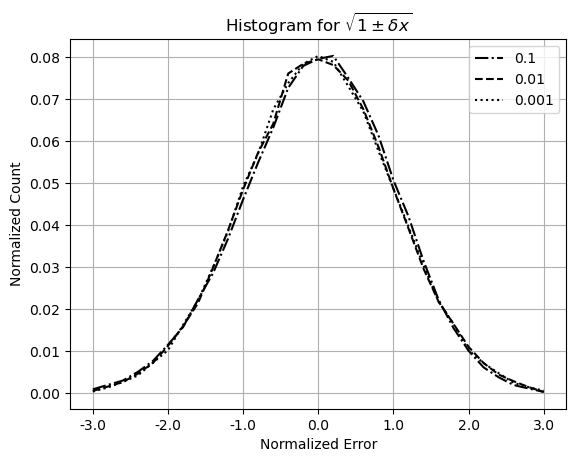

In [32]:
PlotHistoByUncertainty(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.20189: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

# Natural Power

In [33]:
df = pd.read_csv("../Python/Output/NaturalAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0.0,0.2,0.039999,0.056563,0.039813,0.056434,-0.003298,0.997723,0,...,0.017753,0.015053,0.012333,0.010789,0.008304,0.006893,0.006197,0.005103,0.004755,0.001841
1,2,0.2,0.2,0.079999,0.097976,0.080183,0.097897,0.001873,0.999198,0,...,0.022072,0.017951,0.015289,0.012423,0.010587,0.008313,0.006813,0.005487,0.004559,0.002142
2,3,0.0,0.2,0.000000,0.030972,-0.000142,0.030678,-0.004579,0.990510,1208,...,0.009107,0.007529,0.005685,0.004764,0.003995,0.002797,0.002766,0.002172,0.001752,0.000666
3,3,0.2,0.2,0.032000,0.061959,0.031974,0.062016,-0.000419,1.000931,8,...,0.014669,0.011897,0.010414,0.008470,0.007314,0.005688,0.005227,0.003989,0.003938,0.001534
4,3,-0.2,0.2,-0.032000,0.061959,-0.031887,0.061269,0.001821,0.988869,2165,...,0.001574,0.000848,0.000521,0.000317,0.000194,0.000112,0.000143,0.000031,0.000061,0.000020


<AxesSubplot:title={'center':'$(x \\pm 0.2)^n$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

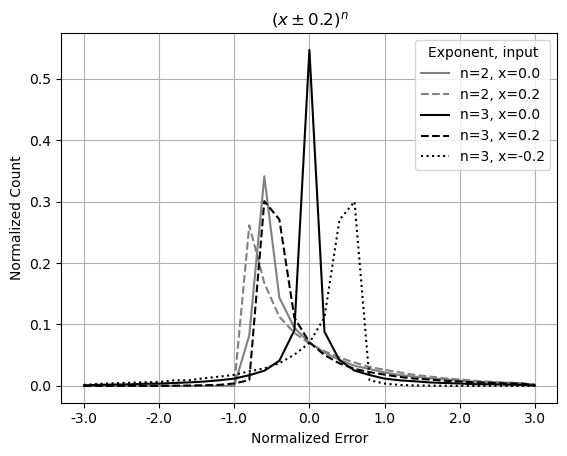

In [34]:
df['Exponent, input'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df[(df['Exponent, input'] == 'n=2, x=0.0') | (df['Exponent, input'] == 'n=2, x=0.2')].set_index('Exponent, input')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(c='gray', style=['-', '--'])
dfPlot = df[(df['Exponent, input'] != 'n=2, x=0.0') & (df['Exponent, input'] != 'n=2, x=0.2')].set_index('Exponent, input')
dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            c='black', style=['-', '--', ':'], ax=ax)

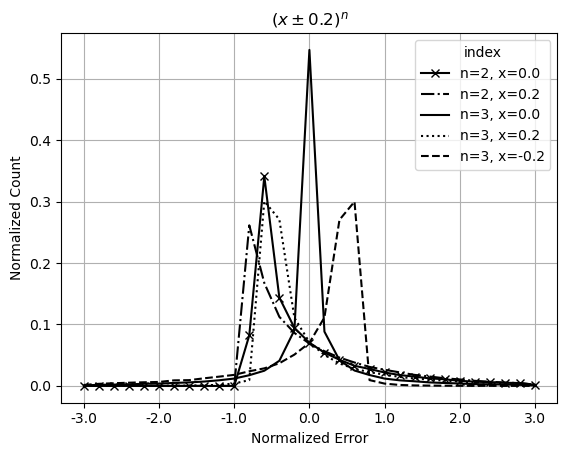

In [35]:
df['index'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df.set_index('index')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            style=['k-x', 'k-.', 'k-', 'k:', 'k--'])

## Expansion

In [36]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Python/Output/PowerExpansion.txt'

In [ ]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

In [ ]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


In [ ]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Imprecise Coefficients

In [ ]:
df = pd.read_csv("../Python/Output/InversionAtOneImprecise.txt", sep='\t')
df.head()

In [ ]:
df['Input Uncertainty'].unique()

In [ ]:
ax = df[df['Input Uncertainty'] == 0.20002].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.20002$', style='k-')
df[df['Input Uncertainty'] == 0.15].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.15$', style='k--', ax=ax)
df[df['Input Uncertainty'] == 0.1].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.1$', style='k-.', ax=ax)
df[df['Input Uncertainty'] == 0.05].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.05$', style='k:', ax=ax,
        grid=True, ylabel=r'Result Uncertainty',  xlabel=r'Taylor Uncertainty $\delta y$', 
        title=r'$\sum_{n = 0}^{\infty} ((-1)^n \pm \delta y) y^n, y \in N(0, \delta x)$')

In [ ]:
df = pd.read_csv("../Python/Output/NormalMomentum_compare.txt", sep='\t')
df.head()

In [ ]:
ax = df.plot(x='Order', y='Var Precision', c='black')
df.plot(x='Order', y='Float Precision', c='gray', ls='--', xlabel=r'Order 2n', ylabel='Precision', grid=True, 
        title=r'Bounded Momentum $\zeta(2n, 5)$', ax=ax)